<a href="https://colab.research.google.com/github/dantebarton/collabNotebook/blob/main/HW3_Dante_Barton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Classification with the MNIST Dataset


Objective:
The primary goal of this assignment is to provide hands-on experience with loading datasets, preparing data for training, and using a  neural network architecture to classify handwritten digits from the MNIST dataset. This assignment aims to deepen understanding of neural networks and familiarize students with practical aspects of training models using PyTorch.

Setup and Requirements Installation:

In [ ]:
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 916.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.3 MB/s eta 0:00:00


1. Load the MNIST Dataset
First, let's import the necessary libraries and load the MNIST dataset.



In [ ]:
#todo: based on what you learned in assignment 2, load train and test datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Get one batch of training images and labels
# images, labels = next(iter(trainloader))
# print("Shape of images:", images.shape)
# print("Shape of labels:", labels.shape)

2. Define the Model Architecture
Here is the neural network model architecture .

In [ ]:
#Original Model Architecture
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(28*28, 128)
#         self.dropout = nn.Dropout(0.2)
#         self.fc2 = nn.Linear(128, 10)

#     def forward(self, x):
#         x = self.flatten(x)
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

# model = Net()

#Modified Model Architecture#

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased number of neurons in the first hidden layer
        self.fc2 = nn.Linear(256, 128)    # Decreased number of neurons in the second hidden layer
        self.dropout1 = nn.Dropout(0.2)   # Added dropout layer after the first hidden layer
        self.fc3 = nn.Linear(128, 64)     # Additional fully connected layer
        self.dropout2 = nn.Dropout(0.2)   # Added dropout layer after the additional fully connected layer
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))          # Applying ReLU activation after the additional fully connected layer
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

# Instantiate the modified model
model = Net()



3. Train the Model
Define the optimizer and loss function, and then train the model.

In [ ]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.42441764193525444
Training loss: 0.2605543776369616
Training loss: 0.22789491272604923
Training loss: 0.20418292797927154
Training loss: 0.19269687280670475


4. Evaluate the Model
Finally, evaluate the model's performance on the test dataset.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        log_ps = model(images)
        _, predicted = torch.max(log_ps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 94 %


In [ ]:
#Change the Number of Epochs
# Modify the number of epochs in the training loop. Try training the model for more epochs (e.g., 10, 15) and fewer epochs (e.g., 1, 3). Observe how this affects the training loss and the accuracy on the test dataset.

# How does increasing the number of epochs affect the model's performance and training time? explain

#In my tests I tried training the model with the following epochs in the following order and received the results in the brackets: 5(94%), 10(95%), 15(95%), 50(96%), 3(96%), 1(97%). When I increased the number of epochs the model's performance increased since it multiples tries to learn from the dataset
#and adjust accordingly. This however lead to longer training time for example with epoch set to 50 it took 14 minutes to complete. I also realized that after training 50 before attempting lower number that the data set might've begun memorizing patterns in the dataset and after a bit of research I learned this is called
#overfitting, where the model learns to memorize the training data instead of generalizing well to unseen data.

In [ ]:
#Modify the Model Architecture
# Change the architecture of the neural network. Here are a few suggestions:
# Add another fully connected layer with ReLU activation and observe the impact.
# Increase or decrease the number of neurons in the hidden layers.
# Introduce dropout in additional places or modify the dropout rate.

#How does each modification affect the model's accuracy and training behavior? explain.

#After researching each change and understanding the impact on the model's accuracy and training behavior I have found the following to be true:
# 1. Add another fully connected layer with ReLU activation:
# This modification can potentially allow the model to learn more complex representations of the data by introducing additional nonlinear transformations. However, adding more parameters may also increase the risk of overfitting, especially if the dataset is not sufficiently large. The impact on accuracy would depend on whether the added complexity helps capture important patterns in the data.

# 2. Increase or decrease the number of neurons in the hidden layers:
# Increasing the number of neurons can provide the model with more capacity to learn complex relationships in the data. This can lead to improved accuracy, especially if the previous architecture was underfitting. However, increasing the number of parameters also increases the risk of overfitting. Decreasing the number of neurons may lead to a simpler model that generalizes better but might sacrifice some accuracy.

# 3. Introduce dropout in additional places or modify the dropout rate:
# Dropout is a regularization technique used to prevent overfitting by randomly dropping units (along with their connections) during training. Increasing the dropout rate or introducing dropout in additional places can help in preventing overfitting, especially in deeper networks or with larger datasets. However, too much dropout can lead to underfitting, where the model fails to capture important patterns in the data.

# Can you achieve higher accuracy with a more complex or deeper network? explain

#Achieving higher accuracy with a more complex or deeper network is possible, but it requires careful consideration of the dataset size and the complexity.


In [ ]:
# Example Changes:

class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)  # Increased number of neurons
        self.fc2 = nn.Linear(256, 128)    # Additional layer
        self.dropout = nn.Dropout(0.3)    # Adjusted dropout rate
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))           # Additional ReLU activation
        x = self.dropout(x)               # Additional dropout
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


7. Visualize the Predictions


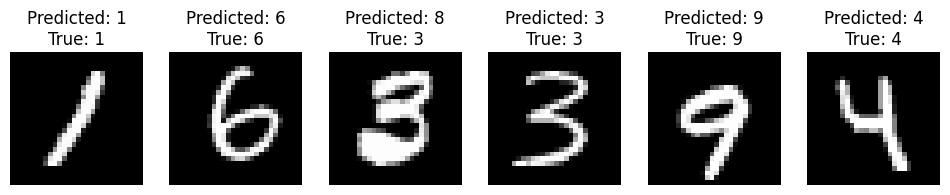

In [ ]:
#Select a few images from the test set and visualize their predicted labels along with the true labels.
# Use Matplotlib to display the images and predictions.

import matplotlib.pyplot as plt
import numpy as np

# Function to visualize images and their predicted/true labels
def visualize_predictions(images, predicted_labels, true_labels, class_names):
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Predicted: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}")
        ax.axis('off')
    plt.show()

# Select a few images and their true labels from the test set
num_images_to_visualize = 6
images_to_visualize = []
true_labels_to_visualize = []
predicted_labels = []

for i, (images, labels) in enumerate(testloader):
    if i == num_images_to_visualize:
        break
    images_to_visualize.append(images[0])  # Assuming batch size is 1
    true_labels_to_visualize.append(labels[0].item())

# Convert images and true labels to tensors
images_to_visualize = torch.stack(images_to_visualize)
true_labels_to_visualize = torch.tensor(true_labels_to_visualize)

# Use the trained model to predict labels for the selected images
with torch.no_grad():
    model.eval()
    outputs = model(images_to_visualize)
    _, predicted_labels = torch.max(outputs, 1)

# Define class names
class_names = [str(i) for i in range(10)]

# Visualize the predictions
visualize_predictions(images_to_visualize, predicted_labels, true_labels_to_visualize, class_names)
